In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [135]:
df=pd.read_csv('Census-Income.csv', header=None)  
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [136]:
df.columns =['Age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','class'] 
df          # naming the columns 

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [137]:
df = df.replace('\?+', np.nan, regex=True)
df                                                       # replace ? with nan value

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [138]:
df=df.drop(['capital-gain','capital-loss'],axis=1)  # capital gain & capital loss is of not much use for my analysis so I dropped
df

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [139]:
df.isnull().sum()

Age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
hours-per-week       0
native-country     583
class                0
dtype: int64

In [140]:
df = df.dropna()                           #  dropping all the NaN values
df = df.reset_index(drop=True)
df

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
30158,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
30159,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
30160,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [141]:
df.isnull().sum()

Age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [142]:
print(df['workclass'].unique())                             
print(df['education'].unique()) 
print(df['education-num'].unique()) 
print(df['marital-status'].unique())                     
print(df['occupation'].unique())    
print(df['relationship'].unique())        
print(df['race'].unique())      
print(df['sex'].unique())           
print(df['native-country'].unique())  
print(df['class'].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
[13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' '

In [143]:
from sklearn.preprocessing import LabelEncoder          
lb=LabelEncoder()

df['workclass']=pd.DataFrame(lb.fit_transform(df['workclass']))
df['education']=pd.DataFrame(lb.fit_transform(df['education']))
df['marital-status']=pd.DataFrame(lb.fit_transform(df['marital-status']))
df['occupation']=pd.DataFrame(lb.fit_transform(df['occupation']))
df['relationship']=pd.DataFrame(lb.fit_transform(df['relationship']))
df['race']=pd.DataFrame(lb.fit_transform(df['race']))
df['sex']=pd.DataFrame(lb.fit_transform(df['sex']))
df['native-country']=pd.DataFrame(lb.fit_transform(df['native-country']))
df['class']=pd.DataFrame(lb.fit_transform(df['class']))
df

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,class
0,39,5,77516,9,13,4,0,1,4,1,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,2,257302,7,12,2,12,5,4,0,38,38,0
30158,40,2,154374,11,9,2,6,0,4,1,40,38,1
30159,58,2,151910,11,9,6,0,4,4,0,40,38,0
30160,22,2,201490,11,9,4,0,3,4,1,20,38,0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             30162 non-null  int64
 1   workclass       30162 non-null  int32
 2   fnlwgt          30162 non-null  int64
 3   education       30162 non-null  int32
 4   education-num   30162 non-null  int64
 5   marital-status  30162 non-null  int32
 6   occupation      30162 non-null  int32
 7   relationship    30162 non-null  int32
 8   race            30162 non-null  int32
 9   sex             30162 non-null  int32
 10  hours-per-week  30162 non-null  int64
 11  native-country  30162 non-null  int32
 12  class           30162 non-null  int32
dtypes: int32(9), int64(4)
memory usage: 2.0 MB


In [147]:
zscore(df)
z=np.abs(zscore(df))                                                 # Removing outliers
np.where(z>3)      
df1=df[(z<3).all(axis=1)] 
df1

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,class
0,39,5,77516,9,13,4,0,1,4,1,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,40,38,0
5,37,2,284582,12,14,2,3,5,4,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,2,257302,7,12,2,12,5,4,0,38,38,0
30158,40,2,154374,11,9,2,6,0,4,1,40,38,1
30159,58,2,151910,11,9,6,0,4,4,0,40,38,0
30160,22,2,201490,11,9,4,0,3,4,1,20,38,0


In [148]:
df1 = df1.reset_index(drop=True)  
df1

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,class
0,39,5,77516,9,13,4,0,1,4,1,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,40,38,0
4,37,2,284582,12,14,2,3,5,4,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27190,27,2,257302,7,12,2,12,5,4,0,38,38,0
27191,40,2,154374,11,9,2,6,0,4,1,40,38,1
27192,58,2,151910,11,9,6,0,4,4,0,40,38,0
27193,22,2,201490,11,9,4,0,3,4,1,20,38,0


In [149]:
df1=df.drop(['fnlwgt','education'],axis=1) # I dropped education because education-num is numbering of education column & fnlwgt is of no use for my analysis
df1 

,Age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,class
0,39,5,13,4,0,1,4,1,40,38,0
1,50,4,13,2,3,0,4,1,13,38,0
2,38,2,9,0,5,1,4,1,40,38,0
3,53,2,7,2,5,0,2,1,40,38,0
4,28,2,13,2,9,5,2,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...
30157,27,2,12,2,12,5,4,0,38,38,0
30158,40,2,9,2,6,0,4,1,40,38,1
30159,58,2,9,6,0,4,4,0,40,38,0
30160,22,2,9,4,0,3,4,1,20,38,0


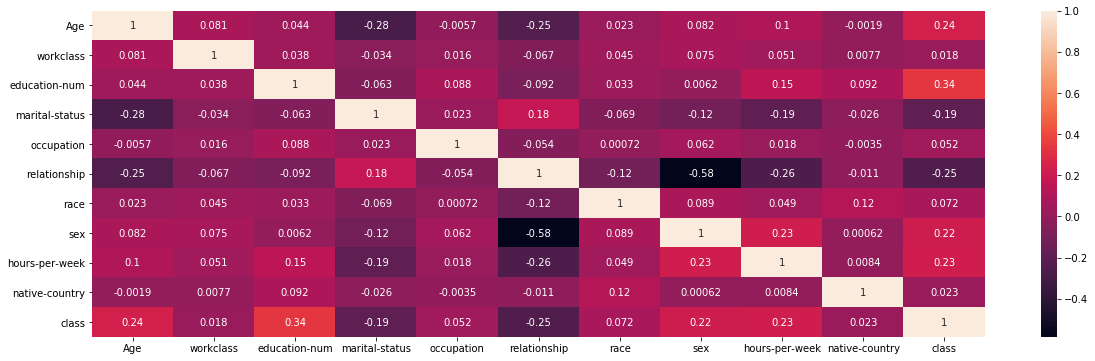

In [150]:
plt.figure(figsize=(20,6))                      # here class is more positively related to Age, education-num, sex and hours-per-week
sns.heatmap(df1.corr(),annot=True)  

In [151]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             30162 non-null  int64
 1   workclass       30162 non-null  int32
 2   education-num   30162 non-null  int64
 3   marital-status  30162 non-null  int32
 4   occupation      30162 non-null  int32
 5   relationship    30162 non-null  int32
 6   race            30162 non-null  int32
 7   sex             30162 non-null  int32
 8   hours-per-week  30162 non-null  int64
 9   native-country  30162 non-null  int32
 10  class           30162 non-null  int32
dtypes: int32(8), int64(3)
memory usage: 1.6 MB


In [152]:
df1.skew()

Age               0.530228
workclass         1.154858
education-num    -0.305379
marital-status   -0.009453
occupation        0.110450
relationship      0.820311
race             -2.507036
sex              -0.750636
hours-per-week    0.330869
native-country   -4.178907
class             1.161408
dtype: float64

In [153]:
import numpy as np                                            # Removing Skewness 
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(np.log1p(df1[col]))

In [154]:
df1.skew()

Age               0.530228
workclass        -2.350109
education-num    -0.305379
marital-status   -0.009453
occupation        0.110450
relationship      0.063641
race             -2.507036
sex              -0.750636
hours-per-week    0.330869
native-country   -4.178907
class             1.161408
dtype: float64

In [155]:
import numpy as np                                            # Removing Skewness 
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.sqrt(np.sqrt(np.sqrt(df1[col])))

In [156]:
df1.skew()

Age               0.530228
workclass        -2.350109
education-num    -0.305379
marital-status   -0.009453
occupation        0.110450
relationship      0.063641
race             -2.507036
sex              -0.750636
hours-per-week    0.330869
native-country   -4.178907
class             1.161408
dtype: float64

In [157]:
df1 

,Age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,class
0,39,1.026672,13,4,0,0.526589,4,1,40,38,0.000000
1,50,0.959135,13,2,3,0.000000,4,1,13,38,0.000000
2,38,0.741276,9,0,5,0.526589,4,1,40,38,0.000000
3,53,0.741276,7,2,5,0.000000,2,1,40,38,0.000000
4,28,0.741276,13,2,9,1.026672,2,0,40,4,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
30157,27,0.741276,12,2,12,1.026672,4,0,38,38,0.000000
30158,40,0.741276,9,2,6,0.000000,4,1,40,38,0.922962
30159,58,0.741276,9,6,0,0.959135,4,0,40,38,0.000000
30160,22,0.741276,9,4,0,0.869742,4,1,20,38,0.000000


In [159]:
df1.skew()

Age               0.530228
workclass        -2.350109
education-num    -0.305379
marital-status   -0.009453
occupation        0.110450
relationship      0.063641
race             -2.507036
sex              -0.750636
hours-per-week    0.330869
native-country   -4.178907
class             1.161408
dtype: float64

In [160]:
collist=df.columns.values
ncol=11
nrows=10 

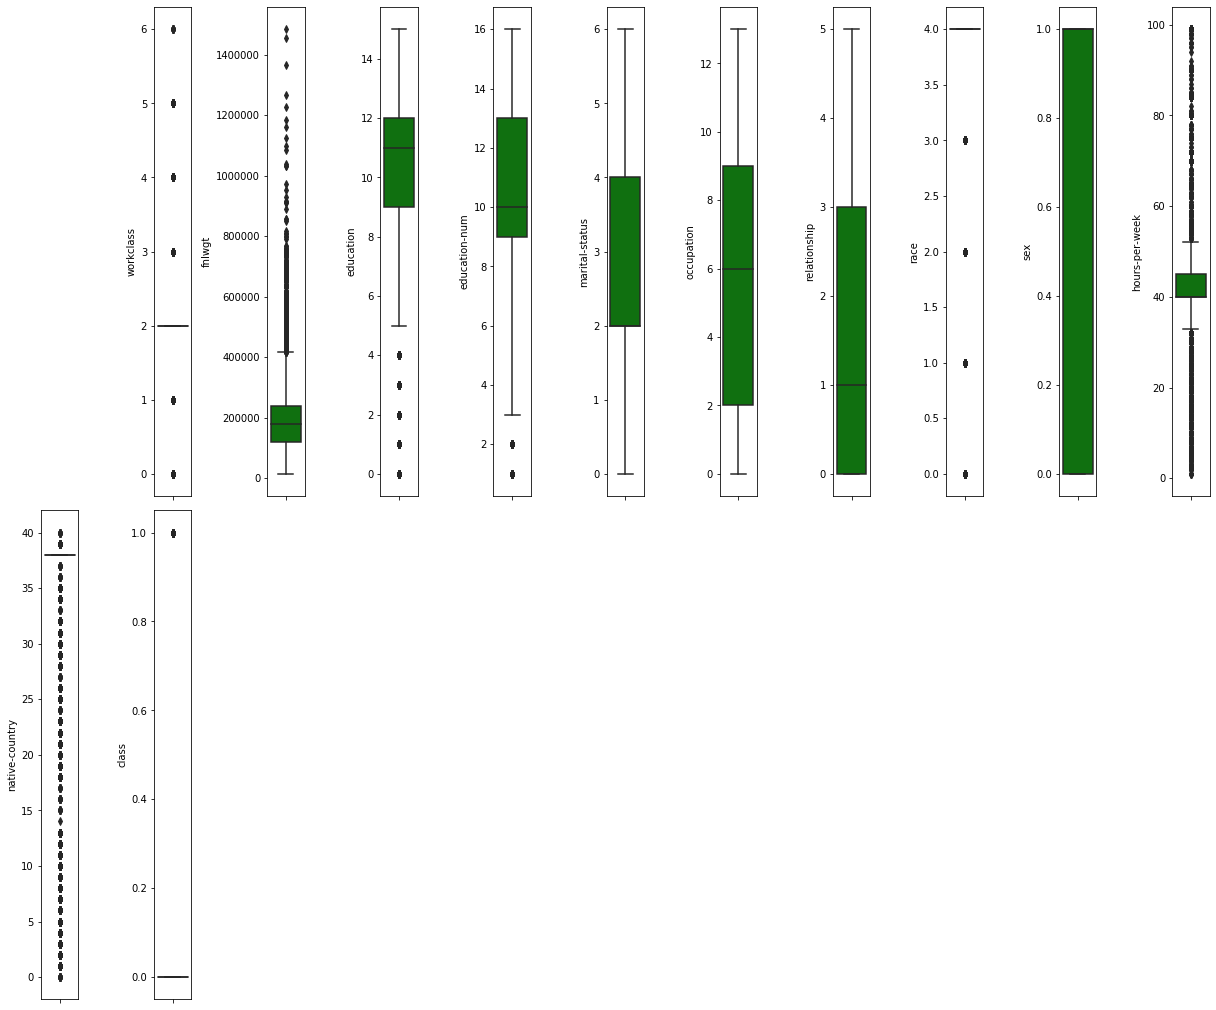

In [161]:
plt.figure(figsize=(17,70))          
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1) 
    sns.boxplot(df[collist[i]],color='green',orient='v') 
    plt.tight_layout()

In [162]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             30162 non-null  int64  
 1   workclass       30162 non-null  float64
 2   education-num   30162 non-null  int64  
 3   marital-status  30162 non-null  int32  
 4   occupation      30162 non-null  int32  
 5   relationship    30162 non-null  float64
 6   race            30162 non-null  int32  
 7   sex             30162 non-null  int32  
 8   hours-per-week  30162 non-null  int64  
 9   native-country  30162 non-null  int32  
 10  class           30162 non-null  float64
dtypes: float64(3), int32(5), int64(3)
memory usage: 2.0 MB


In [163]:
df1

,Age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,class
0,39,1.026672,13,4,0,0.526589,4,1,40,38,0.000000
1,50,0.959135,13,2,3,0.000000,4,1,13,38,0.000000
2,38,0.741276,9,0,5,0.526589,4,1,40,38,0.000000
3,53,0.741276,7,2,5,0.000000,2,1,40,38,0.000000
4,28,0.741276,13,2,9,1.026672,2,0,40,4,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
30157,27,0.741276,12,2,12,1.026672,4,0,38,38,0.000000
30158,40,0.741276,9,2,6,0.000000,4,1,40,38,0.922962
30159,58,0.741276,9,6,0,0.959135,4,0,40,38,0.000000
30160,22,0.741276,9,4,0,0.869742,4,1,20,38,0.000000


In [164]:
df1.skew()

Age               0.530228
workclass        -2.350109
education-num    -0.305379
marital-status   -0.009453
occupation        0.110450
relationship      0.063641
race             -2.507036
sex              -0.750636
hours-per-week    0.330869
native-country   -4.178907
class             1.161408
dtype: float64

In [165]:
import numpy as np                                            # Removing Skewness 
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.sqrt(np.sqrt(np.sqrt(df1[col])))

In [166]:
df1.skew()

Age               0.530228
workclass        -2.350109
education-num    -0.305379
marital-status   -0.009453
occupation        0.110450
relationship      0.063641
race             -2.507036
sex              -0.750636
hours-per-week    0.330869
native-country   -4.178907
class             1.161408
dtype: float64

In [167]:
import numpy as np                                            # Removing Skewness 
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(np.log1p(np.log1p(df1[col])))

In [168]:
df1.skew()

Age               0.530228
workclass        -2.350109
education-num    -0.305379
marital-status   -0.009453
occupation        0.110450
relationship      0.063641
race             -2.507036
sex              -0.750636
hours-per-week    0.330869
native-country   -4.178907
class             1.161408
dtype: float64

In [169]:
df1.shape

(30162, 11)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF6AF5D288>,
      dtype=object)

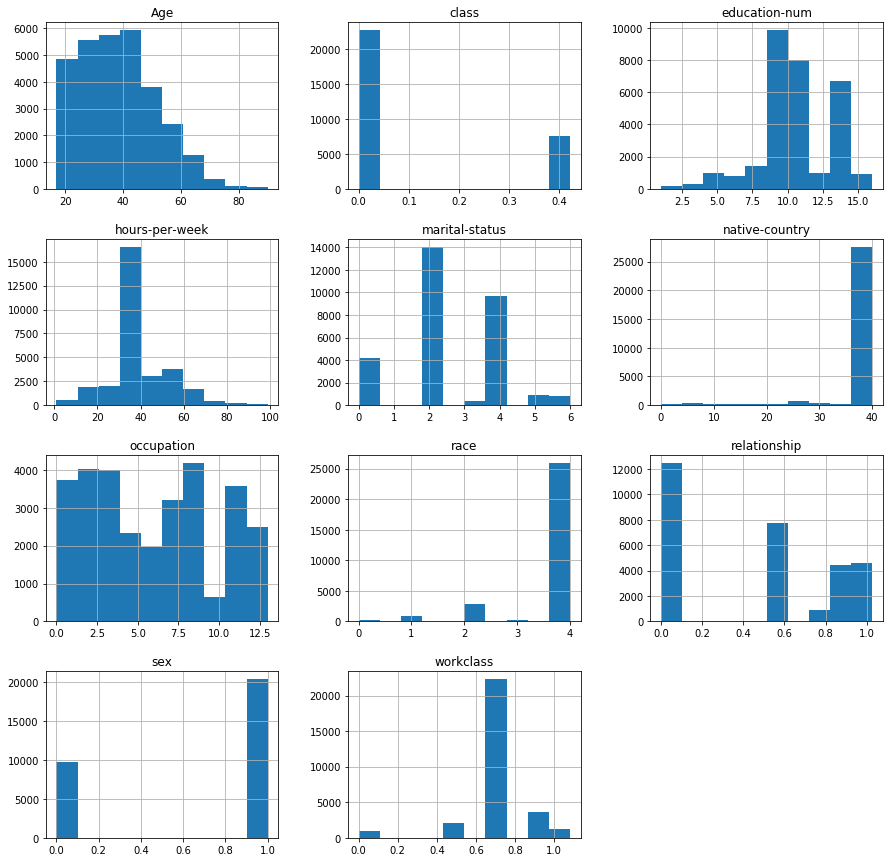

In [170]:
df1.hist(figsize=(15,15))   

# Univariate Analysis

{'bodies': [<matplotlib.collections.PolyCollection at 0x1bf6f7b5b88>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1bf6aec7908>,
 'cmins': <matplotlib.collections.LineCollection at 0x1bf6f7b8c08>,
 'cbars': <matplotlib.collections.LineCollection at 0x1bf6f7b8b88>}

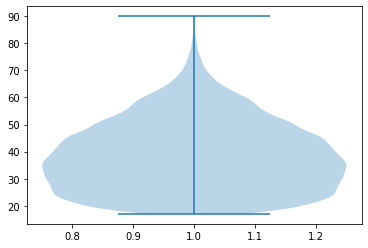

In [171]:
plt.violinplot(df1['Age'])

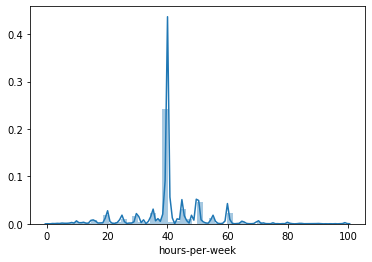

In [172]:
sns.distplot(df1['hours-per-week'])

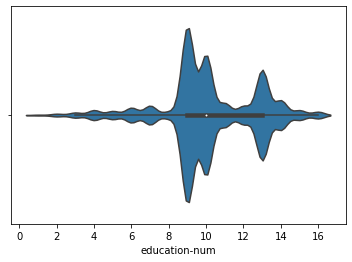

In [173]:
sns.violinplot(df1['education-num'])

# Bivariate Analysis with respect to 'class'(i.e. Income)

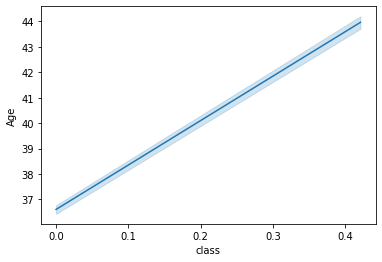

In [174]:
sns.lineplot(x='class', y='Age', data=df1) 

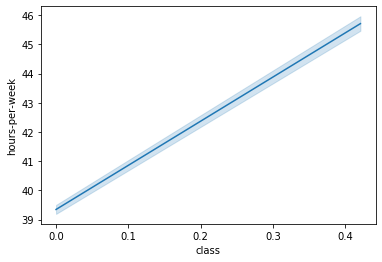

In [175]:
sns.lineplot(x='class', y='hours-per-week', data=df1) 

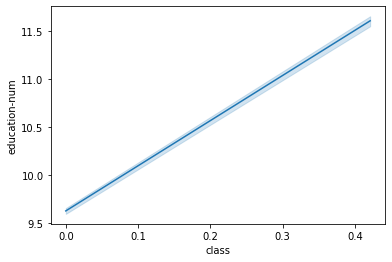

In [176]:
sns.lineplot(x='class', y='education-num', data=df1) 

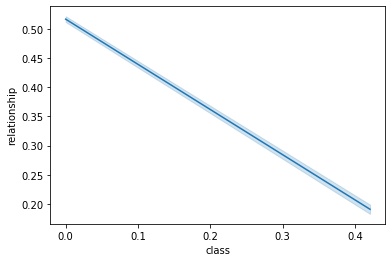

In [177]:
sns.lineplot(x='class', y='relationship', data=df1) 

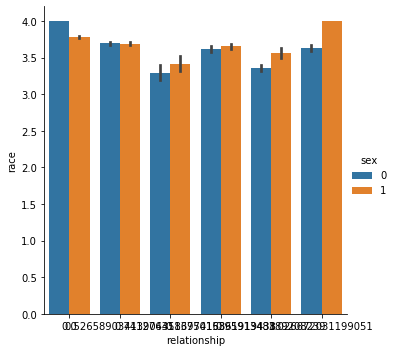

In [178]:
sns.catplot(x='relationship',y='race',hue='sex',data=df1, kind='bar')

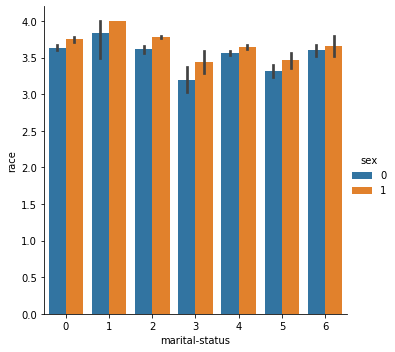

In [179]:
sns.catplot(x='marital-status',y='race',hue='sex',data=df1, kind='bar')

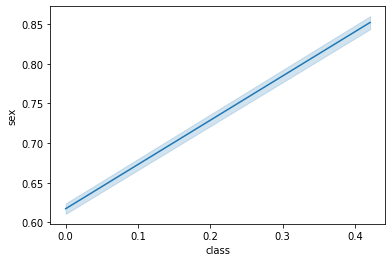

In [180]:
sns.lineplot(x='class', y='sex', data=df1)                                 

In [181]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             30162 non-null  int64  
 1   workclass       30162 non-null  float64
 2   education-num   30162 non-null  int64  
 3   marital-status  30162 non-null  int32  
 4   occupation      30162 non-null  int32  
 5   relationship    30162 non-null  float64
 6   race            30162 non-null  int32  
 7   sex             30162 non-null  int32  
 8   hours-per-week  30162 non-null  int64  
 9   native-country  30162 non-null  int32  
 10  class           30162 non-null  float64
dtypes: float64(3), int32(5), int64(3)
memory usage: 2.0 MB


# Splitting the data into Target and Input

In [182]:
df_x=df1.drop('class',axis=1)
df_x.head()

,Age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,1.026672,13,4,0,0.526589,4,1,40,38
1,50,0.959135,13,2,3,0.000000,4,1,13,38
2,38,0.741276,9,0,5,0.526589,4,1,40,38
3,53,0.741276,7,2,5,0.000000,2,1,40,38
4,28,0.741276,13,2,9,1.026672,2,0,40,4


In [183]:
df1.rename(columns = {'class': 'income'}, inplace = True) # as target 'class' is a keyword so I changed column name to 'income'

In [184]:
df_y=pd.DataFrame(df1.income)
df_y.head() 

,income
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [185]:
print(df_x.shape)
print(df_y.shape) 

(30162, 10)
(30162, 1)


In [186]:
#Standard scaling of input and output variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x) 
x = pd.DataFrame(x,columns=df_x.columns) 
y = sc.fit_transform(df_y)
y = pd.DataFrame(y,columns=df_y.columns)

In [187]:
x

,Age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,0.042796,1.712654,1.128918,0.947847,-1.479055,0.230106,0.385048,0.692806,-0.077734,0.264924
1,0.880288,1.311587,1.128918,-0.387275,-0.734545,-1.100326,0.385048,0.692806,-2.331531,0.264924
2,-0.033340,0.017840,-0.439738,-1.722396,-0.238206,0.230106,0.385048,0.692806,-0.077734,0.264924
3,1.108695,0.017840,-1.224066,-0.387275,-0.238206,-1.100326,-2.011035,0.692806,-0.077734,0.264924
4,-0.794697,0.017840,1.128918,-0.387275,0.754473,1.493570,-2.011035,-1.443405,-0.077734,-5.304034
...,...,...,...,...,...,...,...,...,...,...
30157,-0.870832,0.017840,0.736754,-0.387275,1.498983,1.493570,0.385048,-1.443405,-0.244682,0.264924
30158,0.118931,0.017840,-0.439738,-0.387275,0.009964,-1.100326,0.385048,0.692806,-0.077734,0.264924
30159,1.489374,0.017840,-0.439738,2.282969,-1.479055,1.322937,0.385048,-1.443405,-0.077734,0.264924
30160,-1.251511,0.017840,-0.439738,0.947847,-1.479055,1.097084,0.385048,0.692806,-1.747213,0.264924


In [188]:
y

,income
0,-0.575691
1,-0.575691
2,-0.575691
3,-0.575691
4,-0.575691
...,...
30157,-0.575691
30158,1.737042
30159,-0.575691
30160,-0.575691


In [189]:
print(y['income'].unique()) 

[-0.57569132  1.73704199]


In [190]:
#Converting target variable from float to integer for Machine Learning purpose
from sklearn.preprocessing import LabelEncoder          
lb=LabelEncoder()
y['income']=pd.DataFrame(lb.fit_transform(y['income']))
y

,income
0,0
1,0
2,0
3,0
4,0
...,...
30157,0
30158,1
30159,0
30160,0


In [191]:
print(y['income'].unique()) 

[0 1]


In [210]:
pip install xgboost 

Note: you may need to restart the kernel to use updated packages.


In [193]:
#Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [194]:
# as I got the highest accuracy score with respect to random state 69 in KNeighborsClassifier, so I fix the random state 69 for all the Models 
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=69,test_size=0.20)  

In [195]:
print(train_x.shape,test_x.shape)

(24129, 10) (6033, 10)


In [196]:
print(train_y.shape,test_y.shape)

(24129, 1) (6033, 1)


In [197]:
def max_accuracy_score(clf,x,y):
    max_acc_score=0
    for r_state in range(42,100):
        train_x, test_x, train_y, test_y = train_test_split(x,y,random_state = r_state,test_size=0.20)
        clf.fit(train_x,train_y)
        pre = clf.predict(test_x) 
        acc_scr=accuracy_score(test_y,pre)
        print("accuracy score corresponding to random state ",r_state,"is",acc_scr)
        if acc_scr>max_acc_score:
            max_acc_score=acc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state,"is",max_acc_score)
    return final_r_state         

In [198]:
kn=KNeighborsClassifier(n_neighbors=15) 
r_state=max_accuracy_score(kn,x,y) 

accuracy score corresponding to random state  42 is 0.825957235206365
accuracy score corresponding to random state  43 is 0.8228078899386706
accuracy score corresponding to random state  44 is 0.8226421349245815
accuracy score corresponding to random state  45 is 0.8310956406431295
accuracy score corresponding to random state  46 is 0.8262887452345433
accuracy score corresponding to random state  47 is 0.8281120503895243
accuracy score corresponding to random state  48 is 0.8221448698823139
accuracy score corresponding to random state  49 is 0.8256257251781867
accuracy score corresponding to random state  50 is 0.825957235206365
accuracy score corresponding to random state  51 is 0.825957235206365
accuracy score corresponding to random state  52 is 0.8267860102768109
accuracy score corresponding to random state  53 is 0.8262887452345433
accuracy score corresponding to random state  54 is 0.8180009945300846
accuracy score corresponding to random state  55 is 0.8256257251781867
accuracy 



Model name - KNeighborsClassifier



Accuracy_score =  0.8349080059671805


Cross_Val_Score =  0.8246804359733394


classification_report
               precision    recall  f1-score   support

           0       0.88      0.91      0.89      4580
           1       0.68      0.61      0.64      1453

    accuracy                           0.83      6033
   macro avg       0.78      0.76      0.77      6033
weighted avg       0.83      0.83      0.83      6033



confusion matrix
 [[4156  424]
 [ 572  881]]


roc_auc_score =  0.7568776541232265


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

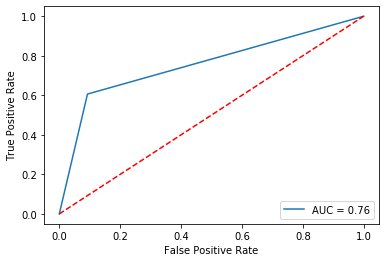

In [200]:
print('\n')
print('Model name - KNeighborsClassifier\n')
print('\n')
kn=KNeighborsClassifier(n_neighbors=15)  
kn.fit(train_x,train_y) 
pre=kn.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score = ',AS)
print('\n')
sc = cross_val_score(kn, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - SupportVectorClassifier



Accuracy_score=  0.832587435769932


Cross_Val_Score =  0.8251111957088435


classification_report
               precision    recall  f1-score   support

           0       0.86      0.93      0.89      4580
           1       0.70      0.53      0.61      1453

    accuracy                           0.83      6033
   macro avg       0.78      0.73      0.75      6033
weighted avg       0.82      0.83      0.82      6033



confusion matrix
 [[4248  332]
 [ 678  775]]


roc_auc_score =  0.7304450662234737


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

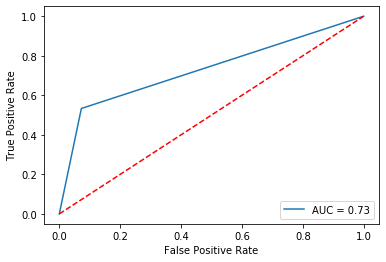

In [201]:
print('\n')
print('Model name - SupportVectorClassifier\n')
print('\n')
sv=SVC(C=10,kernel='rbf') 
sv.fit(train_x,train_y)
pre=sv.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS) 
print('\n')
sc = cross_val_score(sv, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - DecisionTreeClassifier



Accuracy_score=  0.7835239515995359


Cross_Val_Score =  0.7783311895720889


classification_report
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4580
           1       0.55      0.55      0.55      1453

    accuracy                           0.78      6033
   macro avg       0.70      0.70      0.70      6033
weighted avg       0.78      0.78      0.78      6033



confusion matrix
 [[3927  653]
 [ 653  800]]


roc_auc_score =  0.7040042886724349


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

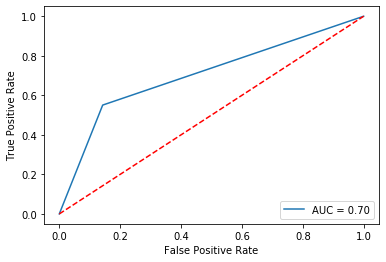

In [202]:
print('\n')
print('Model name - DecisionTreeClassifier\n')
print('\n')
dt=DecisionTreeClassifier(criterion='gini') 
dt.fit(train_x,train_y)
pre=dt.predict(test_x)  
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)  
print('\n')
sc = cross_val_score(dt, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - RandomForestClassifier



Accuracy_score=  0.8294380905022377


Cross_Val_Score =  0.8174859703061961


classification_report
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      4580
           1       0.66      0.61      0.63      1453

    accuracy                           0.83      6033
   macro avg       0.77      0.75      0.76      6033
weighted avg       0.83      0.83      0.83      6033



confusion matrix
 [[4124  456]
 [ 573  880]]


roc_auc_score =  0.7530400887187177


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

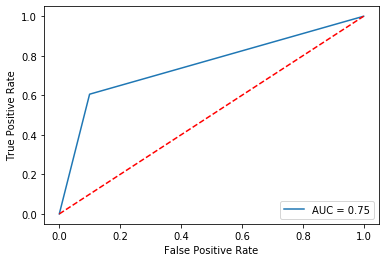

In [203]:
print('\n')
print('Model name - RandomForestClassifier\n')
print('\n')
rfc=RandomForestClassifier(criterion='gini',n_estimators=1000) 
rfc.fit(train_x,train_y) 
pre=rfc.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(rfc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - GradientBoostingClassifier



Accuracy_score=  0.8296038455163268


Cross_Val_Score =  0.8161596993693561


classification_report
               precision    recall  f1-score   support

           0       0.83      0.97      0.90      4580
           1       0.81      0.38      0.52      1453

    accuracy                           0.83      6033
   macro avg       0.82      0.68      0.71      6033
weighted avg       0.83      0.83      0.81      6033



confusion matrix
 [[4452  128]
 [ 900  553]]


roc_auc_score =  0.6763221403090128


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

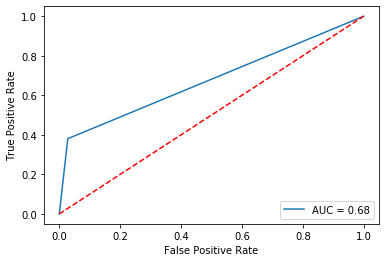

In [204]:
print('\n')
print('Model name - GradientBoostingClassifier\n')
print('\n')
gbc=GradientBoostingClassifier(learning_rate=0.001, n_estimators=900) 
gbc.fit(train_x,train_y)
pre=gbc.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(gbc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - Logistic Regression



Accuracy_score=  0.8238024200232057


Cross_Val_Score =  0.8085675974957118


classification_report
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      4580
           1       0.70      0.46      0.56      1453

    accuracy                           0.82      6033
   macro avg       0.78      0.70      0.72      6033
weighted avg       0.81      0.82      0.81      6033



confusion matrix
 [[4299  281]
 [ 782  671]]


roc_auc_score =  0.7002247270366686


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

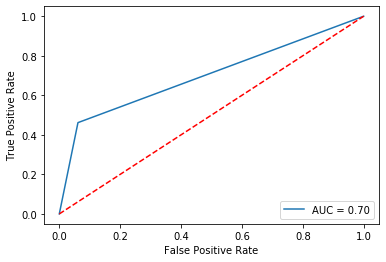

In [205]:
print('\n')
print('Model name - Logistic Regression\n')
print('\n')
lor=LogisticRegression(penalty='l2', C=15, fit_intercept=True)
lor.fit(train_x,train_y)
pre=lor.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(lor, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - AdaBoost Classifier



Accuracy_score=  0.7856787667826952


Cross_Val_Score =  0.7784968401867753


classification_report
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4580
           1       0.56      0.55      0.55      1453

    accuracy                           0.79      6033
   macro avg       0.71      0.71      0.71      6033
weighted avg       0.79      0.79      0.79      6033



confusion matrix
 [[3938  642]
 [ 651  802]]


roc_auc_score =  0.7058933932805789


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

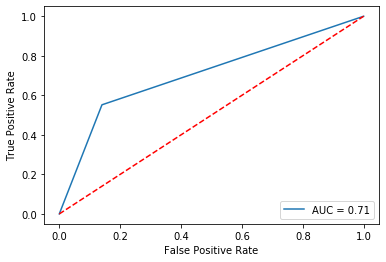

In [206]:
print('\n')
print('Model name - AdaBoost Classifier\n')
print('\n')
adc=AdaBoostClassifier(base_estimator=dt,learning_rate=0.01,n_estimators=10,algorithm='SAMME')
adc.fit(train_x,train_y)
pre=adc.predict(test_x)  
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(adc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - XGBoost Classifier



Accuracy_score=  0.8425327366152826


Cross_Val_Score =  0.8362508231427747


classification_report
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      4580
           1       0.69      0.62      0.66      1453

    accuracy                           0.84      6033
   macro avg       0.79      0.77      0.78      6033
weighted avg       0.84      0.84      0.84      6033



confusion matrix
 [[4181  399]
 [ 551  902]]


roc_auc_score =  0.7668333398449827


ROC-CURVE


Text(0.5, 0, 'False Positive Rate')

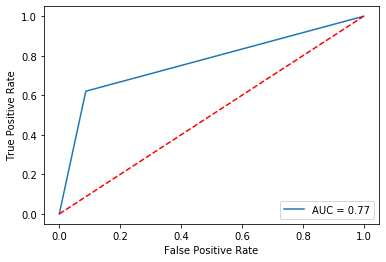

In [207]:
print('\n')
print('Model name - XGBoost Classifier\n')
print('\n')
xgb=XGBClassifier(alpha=1, max_depth=6)
xgb.fit(train_x,train_y)
pre=xgb.predict(test_x) 
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(xgb, x, y, cv=10, scoring='accuracy').mean() 
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC-CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - GaussianNB



Accuracy_score =  0.7722526106414719


Cross_Val_Score =  0.7641735514665349


classification_report
               precision    recall  f1-score   support

           0       0.90      0.78      0.84      4580
           1       0.52      0.73      0.61      1453

    accuracy                           0.77      6033
   macro avg       0.71      0.76      0.72      6033
weighted avg       0.81      0.77      0.78      6033



confusion matrix
 [[3594  986]
 [ 388 1065]]


roc_auc_score =  0.7588412169371005


ROC-CURVE


Text(0.5, 0, 'False Positive Rate')

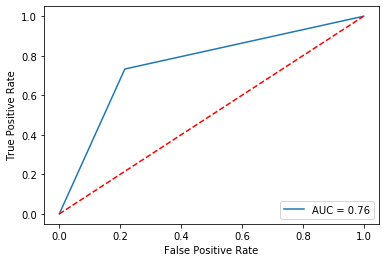

In [208]:
print('\n')
print('Model name - GaussianNB\n')
print('\n')
gnb=GaussianNB()
gnb.fit(train_x,train_y)
pre=gnb.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score = ',AS)
print('\n')
sc = cross_val_score(gnb, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n') 
print('ROC-CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate')

In [209]:
# Here XGBClassifier is working best with an Accuracy Score of 0.8425327366152826 so I am saving the Model
from sklearn.externals import joblib
joblib.dump(xgb, 'XGBoost_Census_Income.pkl')  

['XGBoost_Census_Income.pkl']